# MOVIE LENS RECOMMENDATION SYSTEM

# BUSINESS UNDERSTANDING.

## 1.1 Overview

Recommendation systems are essential for the success of entertainment platforms like Netflix, Amazon Prime and Hulu. These systems help users discover new content based on their viewing history and preferences, thereby enhancing user engagement and satisfaction. This project leverages the MovieLens dataset, created by the GroupLens Research Lab at the University of Minnesota, which is one of the most extensively used datasets for developing and testing recommendation systems in the movie industry. It contains millions of movie ratings from users, along with detailed information about the movies, such as titles, genres, and release years. There are, however, major challenges in building a recommendation system that require strategic solutions. One `major challenge` is dealing with the `sparsity and cold start problem`. The MovieLens dataset and other similar datasets typically suffer from sparsity, where most users have rated only a small fraction of all available movies. This sparsity makes it challenging to accurately predict user preferences, especially for new or less active users who have rated very few movies (cold start problem). A `solution` to address data sparsity is to implement item-item collaborative filtering whereas a way to address the cold start problem is to integrate content-based filtering techniques. The metric of success of the model should be an accuracy score of at least 80%. In conclusion, by leveraging collaborative filtering, matrix factorization, and hybrid methods, we are looking to obtain a comprehensive recommendation system that provides personalized movie suggestions that not only suggests movies based on user ratings and preferences but also incorporates real-time feedback to continually improve the accuracy and relevance of recommendations.

## 1.2 Business Problem

We have been tasked to develop a personalized movie recommendation system that maximizes user satisfaction and engagement, taking into account their ratings on other movies. For this analysis, we’re leveraging the MovieLens dataset that contains information on movies and explicit ratings by the users. The goal is to increase user satisfaction, encourage longer engagement on the platform, and potentially increase revenue through improved user retention and targeted content promotion.

## 1.3 Objectives

The MAIN objective is `to build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies`.

The specific objectives are:
-	To implement a collaborative filtering algorithm to analyze user ratings and identify similarities between users or items.
-	To integrate content-based filtering techniques to enhance recommendation quality by addressing the cold start problem.
-	To evaluate the model's performance using appropriate metrics such as precision, recall, and mean average precision (MAP).


# DATA UNDERSTANDING.

This project analysis uses the MovieLens dataset, created by the GroupLens Research Lab at the University of Minnesota, which contains information on movies and explicit ratings by the users.

The dataset is a folder with csv files(movies, ratings, links and tags) downloaded from:https://grouplens.org/datasets/movielens/latest/

This dataset(movielens_dataset) describes 5-star rating and free-text tagging activity from MovieLens (http://movielens.org/), a movie recommendation service.

It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.


In [1]:
#import library
import pandas as pd

In [2]:
# read the MovieLens dataset
ratings = pd.read_csv('movielens_dataset/ratings.csv')
movies = pd.read_csv('movielens_dataset/movies.csv')

In [3]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

Movie information is contained in the file `movies.csv`. Each line of this file after the header row represents one movie, and has the following format: movieId, title, genres

It contains 9742 rows and 3 columns.

Genres are a pipe-separated list, and are selected from the following:
* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)


In [6]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

All ratings are contained in the file `ratings.csv`. Each line of this file after the header row represents one rating of one movie by one user, and has the following format: userId, movieId, rating, timestamp

It contains 100836 rows and 4 columns.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).


# DATA CLEANING.

In [7]:
#view the first 5 rows of the dataset
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [19]:
movies.shape

(9742, 3)

The shape of the movies dataset is 9742 rows and 3 columns.

In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


- `movieId` has 9742 non-null integers.
- `title` and `genres` have 9742 non-null objects (typically strings).

In [9]:
#view the first 5 rows of the dataset
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [20]:
ratings.shape

(100836, 4)

The shape of the ratings dataset is 100836 rows and 4 columns.

In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


- `userId`, `movieId` and `timestamp` have 100836 non-null integers.
- `rating` has 100836 non-null floats.

In [15]:
#statistical information on numerical columns in ratings
numerical_cols= ratings[['rating','timestamp']].describe()
print(numerical_cols)

              rating     timestamp
count  100836.000000  1.008360e+05
mean        3.501557  1.205946e+09
std         1.042529  2.162610e+08
min         0.500000  8.281246e+08
25%         3.000000  1.019124e+09
50%         3.500000  1.186087e+09
75%         4.000000  1.435994e+09
max         5.000000  1.537799e+09


In [16]:
# Check for dumplicates
ratings.duplicated().sum()
movies.duplicated().sum()

0

There are no duplicates.

In [17]:
# Check the sum of missing values
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [18]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

From the above, it clear that there are no missing values in both movies and ratings thus the dataset contains no null values and is complete.

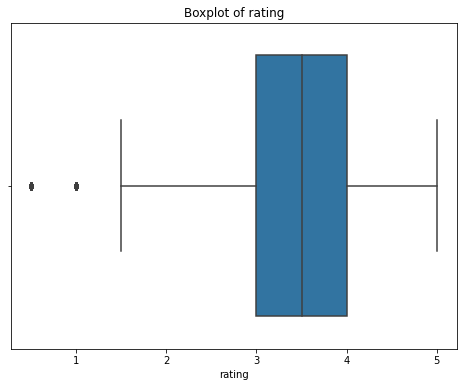

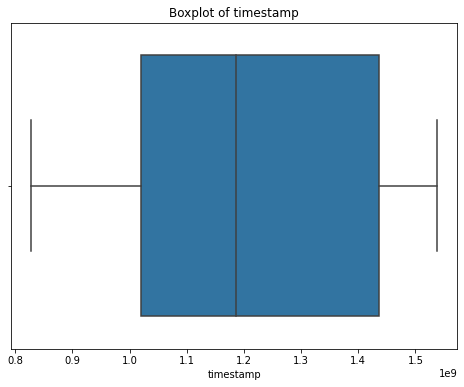

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#numeric columns to check for outliers in ratings
numeric_columns = ['rating', 'timestamp']

#plot boxplots for each numeric feature
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=ratings[column])
    plt.xlabel(column)
    plt.title(f'Boxplot of {column}')
    plt.show()